In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# Probit and Logit Regression

**The building block of artificial intelligence**

*Posted on: September 2023*

The fundamental building block of neural network is a model that mimic neuron cell. We can model this neuron using a model that output a value between 0 and 1, zero representing inactive cell and 1 representing active cell. Two populars model that output a value between 0 and 1 are probit regression and logit regression.

Probit and logit regression are family of regression model that model a process that output a value between 0 and 1. Usually, the process is the probability of an event happening.

Both are similar in term of how they model the output, which is using the cumulative distribution function (cdf) of a model. The differecne is that while the probit regression uses the cdf of normal distribution, the logit regression uses the cdf of logistic distribution.

An example of a process that can be modelled with probit regression and logit regression is the banknote data from [UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/dataset/267/banknote+authentication). This data contains the wavelet result of images.

In [13]:
data_path = "https://archive.ics.uci.edu/static/public/267/banknote+authentication.zip"

df = pd.read_csv(data_path, header=None)
df.head()

,0,1,2,3,4
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


Text(0, 0.5, 'Number of Data')

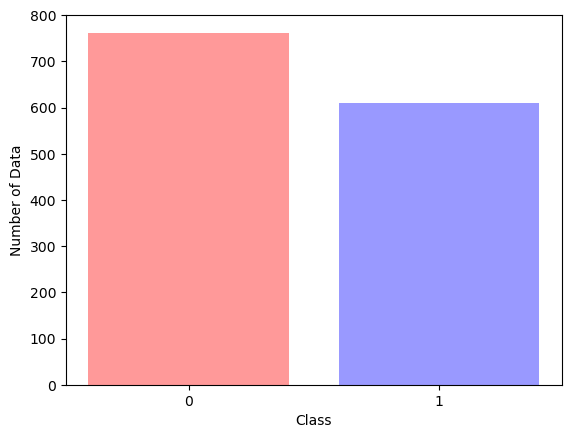

In [81]:
plt.bar(x=df[4].value_counts().keys(), height=df[4].value_counts().values, color=["red", "blue"], alpha=0.4)
plt.xticks([0, 1])
plt.xlabel("Class")
plt.ylabel("Number of Data")

In [35]:
X_train, X_test, y_train, y_test = train_test_split(df[[1, 2, 3]], df[4], test_size=0.33, random_state=0)

## Probit Regression

The probit model can be written mathematically as:

aasa

In [36]:
probit_model = sm.Probit(y_train, X_train)
probit_res = probit_model.fit()
print(probit_res.summary())

Optimization terminated successfully.
         Current function value: 0.434708
         Iterations 6
                          Probit Regression Results                           
Dep. Variable:                      4   No. Observations:                  919
Model:                         Probit   Df Residuals:                      916
Method:                           MLE   Df Model:                            2
Date:                Sun, 17 Sep 2023   Pseudo R-squ.:                  0.3675
Time:                        17:33:38   Log-Likelihood:                -399.50
converged:                       True   LL-Null:                       -631.66
Covariance Type:            nonrobust   LLR p-value:                1.489e-101
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
1             -0.3449      0.021    -16.506      0.000      -0.386      -0.304
2             -0.2212      0.

### Logit Regression

Logistic regression can be expressed mathematically as ....

In [70]:
logit_model = sm.Logit(y_train, X_train)
logit_res = logit_model.fit()
print(logit_res.summary())

Optimization terminated successfully.
         Current function value: 0.437725
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      4   No. Observations:                  919
Model:                          Logit   Df Residuals:                      916
Method:                           MLE   Df Model:                            2
Date:                Sun, 17 Sep 2023   Pseudo R-squ.:                  0.3632
Time:                        17:56:05   Log-Likelihood:                -402.27
converged:                       True   LL-Null:                       -631.66
Covariance Type:            nonrobust   LLR p-value:                2.382e-100
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
1             -0.5808      0.038    -15.100      0.000      -0.656      -0.505
2             -0.3699      0.

## Comparing Both Model

Many documentation state that probit and logit model result do not differ much from each other. However because of the interpretability of the logit model, this model is used more often in binary regression.

In [71]:
probit_pred = probit_model.predict(probit_res.params, X_test)
logit_pred = logit_model.predict(logit_res.params, X_test)

Text(0, 0.5, 'Number of Data')

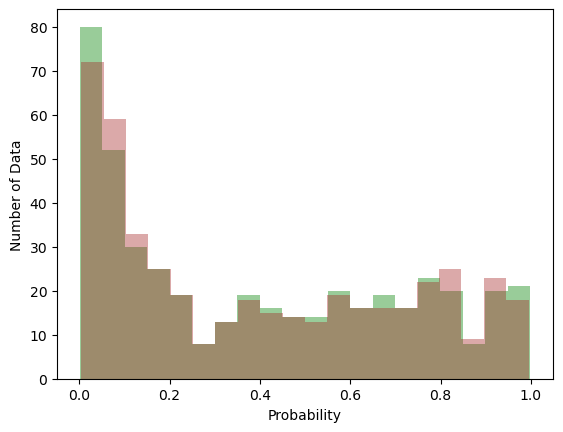

In [85]:
n_bins = 20
fig, ax = plt.subplots(1, 1)

ax.hist(probit_pred, bins=n_bins, color="green", alpha=0.4)
ax.hist(logit_pred, bins=n_bins, color="brown", alpha=0.4)
plt.xlabel("Probability")
plt.ylabel("Number of Data")

## Intepreting Coefficient of Probit Regression and Logit Regression

Probit model used z score ......

Contrast to probit model, we can interpret logit regression directly to odds. .......

## Conclusion